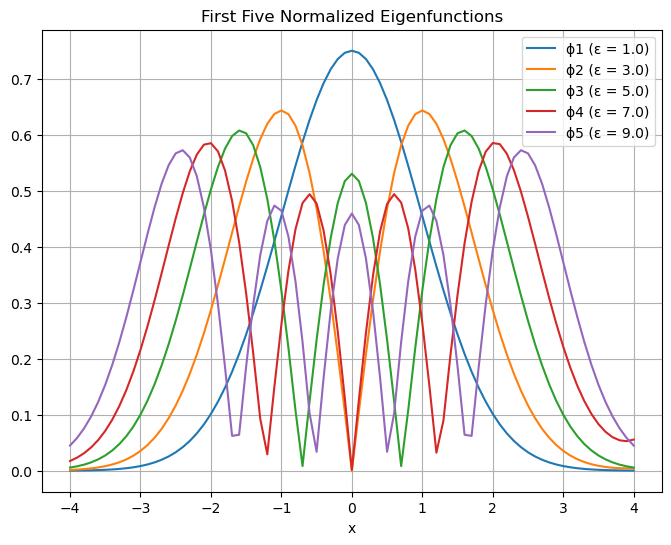

[0.99999998 2.99996814 4.99998953 6.99605377 8.99906061]
[[2.56183470e-04 1.45454848e-03 5.66711043e-03 1.73893573e-02
  4.50516581e-02]
 [3.76940965e-04 2.08367713e-03 7.88695716e-03 2.34477867e-02
  5.86293690e-02]
 [5.51714864e-04 2.96887981e-03 1.09156754e-02 3.14367169e-02
  7.58483957e-02]
 [8.01216066e-04 4.19569397e-03 1.49786781e-02 4.17692876e-02
  9.71899060e-02]
 [1.15311660e-03 5.87332836e-03 2.03472413e-02 5.48997687e-02
  1.23080898e-01]
 [1.64382706e-03 8.13856452e-03 2.73391696e-02 7.13039763e-02
  1.53831231e-01]
 [2.32055909e-03 1.11595086e-02 3.63163648e-02 9.14507849e-02
  1.89559851e-01]
 [3.24364379e-03 1.51387805e-02 4.76780810e-02 1.15763609e-01
  2.30113234e-01]
 [4.48904553e-03 2.03156175e-02 6.18486348e-02 1.44571574e-01
  2.74981544e-01]
 [6.15097107e-03 2.69662600e-02 7.92584568e-02 1.78051235e-01
  3.23220532e-01]
 [8.34442598e-03 3.54018997e-02 1.00317630e-01 2.16161154e-01
  3.73389569e-01]
 [1.12075190e-02 4.59634227e-02 1.25381539e-01 2.58573348e-01
 

In [21]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def bvpexam_rhs(y, x, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

L = 4
tol = 10**(-6)

A1 = np.zeros((81, 5))  # 81 grid points, 5 eigenfunctions
A2 = np.zeros(5)         # 5 eigenvalues

xspan = [-L, L]  # x range
x = np.linspace(xspan[0], xspan[1], 81)  # grid for odeint
A = 0.1  # initial derivative value

# Iterate over 5 eigenfunctions
for i in range(1,6):
    dA = 0.1  # step size for derivative adjustment
    
    for j in range(1000):
                # Ensure sqrt argument is non-negative
        if A < L**2:
            y0 = [1, np.sqrt(L**2 - A)]  # initial condition
        else:
            y0 = [1, 0]  # Avoid complex numbers in sqrt
        
        ysol = odeint(bvpexam_rhs, y0, x, args=(A,))  # solve ODE
        
        if abs(ysol[-1, 1] + np.sqrt(L**2 - A) * ysol[-1,0]) < tol:  # check convergence at the end
            break
        
        if (-1)**(i + 1) * (ysol[-1, 1] + np.sqrt(L**2 - A)) > 0:  # adjust launch angle
            A += dA
        else:
            A -= dA
            dA /= 2  # refine search

    ysol_mode = np.abs(ysol[:,0] / np.sqrt(np.trapz(ysol[:,0]**2,x))) ## normalize
    
    A1[:, i-1] = ysol_mode # eigenfunction
  
    A2[i-1] = A # eigenvalue

    A+=.2

# Plot all five normalized eigenfunctions
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(x, A1[:, i], label=f'ϕ{i+1} (ε = {A2[i]:.1f})')  # Plot eigenfunctions with labels

plt.xlabel('x')
plt.title('First Five Normalized Eigenfunctions')
plt.legend()  # Add a legend to differentiate the eigenfunctions
plt.grid(True)
plt.show()

print(A2)
print(A1)

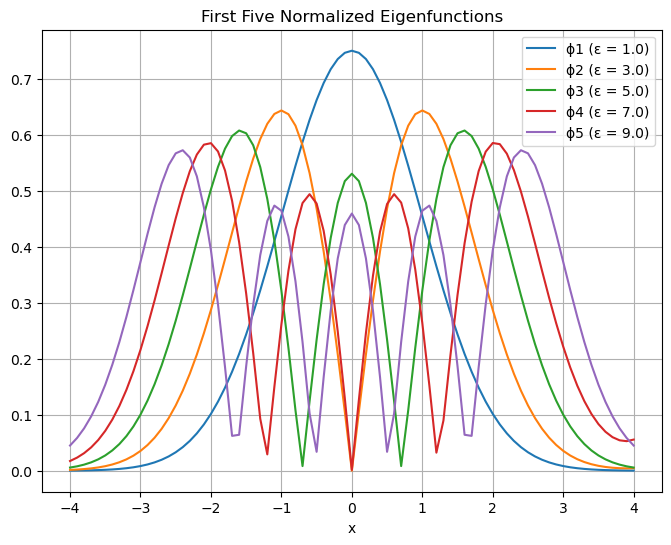

[0.99999998 2.99996814 4.99998953 6.99605377 8.99906061]
[[2.56183470e-04 1.45454850e-03 5.66710945e-03 1.73893852e-02
  4.50512632e-02]
 [3.76940965e-04 2.08367715e-03 7.88695581e-03 2.34478242e-02
  5.86288550e-02]
 [5.51714864e-04 2.96887985e-03 1.09156735e-02 3.14367672e-02
  7.58477308e-02]
 [8.01216066e-04 4.19569402e-03 1.49786755e-02 4.17693545e-02
  9.71890540e-02]
 [1.15311660e-03 5.87332844e-03 2.03472378e-02 5.48998566e-02
  1.23079819e-01]
 [1.64382706e-03 8.13856463e-03 2.73391649e-02 7.13040905e-02
  1.53829883e-01]
 [2.32055909e-03 1.11595087e-02 3.63163586e-02 9.14509313e-02
  1.89558189e-01]
 [3.24364379e-03 1.51387807e-02 4.76780728e-02 1.15763794e-01
  2.30111216e-01]
 [4.48904553e-03 2.03156178e-02 6.18486242e-02 1.44571806e-01
  2.74979134e-01]
 [6.15097106e-03 2.69662604e-02 7.92584432e-02 1.78051520e-01
  3.23217698e-01]
 [8.34442598e-03 3.54019001e-02 1.00317613e-01 2.16161501e-01
  3.73386296e-01]
 [1.12075190e-02 4.59634233e-02 1.25381518e-01 2.58573762e-01
 

In [19]:
import numpy as np # 4th attempt
from scipy.integrate import odeint, simpson  # simpson for integration
import matplotlib.pyplot as plt

def bvpexam_rhs(y, x, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

L = 4
tol = 10**(-6)
A1 = np.zeros((81, 5))  # 81 grid points, 5 eigenfunctions
A2 = np.zeros(5)         # 5 eigenvalues

xspan = [-L, L]  # x range
x = np.linspace(xspan[0], xspan[1], 81)  # grid for odeint
A = 0.1  # initial derivative value

# Iterate over 5 eigenfunctions
for i in range(1,6):
    dA = 0.1  # step size for derivative adjustment
    
    for j in range(1000):
                # Ensure sqrt argument is non-negative
        if A < L**2:
            y0 = [1, np.sqrt(L**2 - A)]  # initial condition
        else:
            y0 = [1, 0]  # Avoid complex numbers in sqrt
        
        ysol = odeint(bvpexam_rhs, y0, x, args=(A,))  # solve ODE
        
        if abs(ysol[-1, 1] + np.sqrt(L**2 - A) * ysol[-1,0]) < tol:  # check convergence at the end
            break
        
        if (-1)**(i + 1) * (ysol[-1, 1] + np.sqrt(L**2 - A)) > 0:  # adjust launch angle
            A += dA
        else:
            A -= dA
            dA /= 2  # refine search

    integral = simpson(ysol[:, 0]**2, x=x)  # Pass x as a keyword argument
    
    normalized_eigenfunction = ysol[:, 0] / np.sqrt(integral) # normalize
    
    A1[:, i-1] = np.abs(normalized_eigenfunction) # eigenfunction
  
    A2[i-1] = A # eigenvalue

    A+=.2

# Plot all five normalized eigenfunctions
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(x, A1[:, i], label=f'ϕ{i+1} (ε = {A2[i]:.1f})')  # Plot eigenfunctions with labels

plt.xlabel('x')
plt.title('First Five Normalized Eigenfunctions')
plt.legend()  # Add a legend to differentiate the eigenfunctions
plt.grid(True)
plt.show()

print(A2)
print(A1)

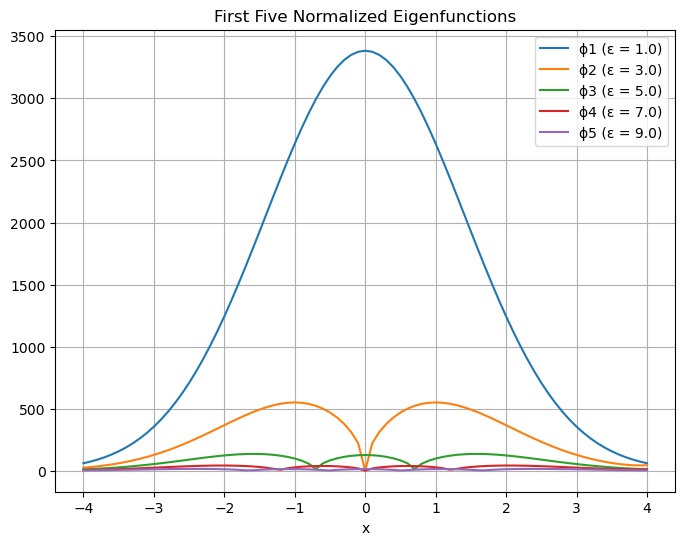

[0.99999998 2.99996814 4.99998953 6.99605378 8.9990606 ]
[[6.24776158e+01 2.62201939e+01 1.32837032e+01 7.58329995e+00
  4.71134178e+00]
 [7.57854031e+01 3.13824619e+01 1.56708685e+01 8.80577117e+00
  5.37460845e+00]
 [9.16866781e+01 3.74600287e+01 1.84358698e+01 1.01961229e+01
  6.11311295e+00]
 [1.10490190e+02 4.45321537e+01 2.15960870e+01 1.17528990e+01
  6.91989973e+00]
 [1.32551763e+02 5.26882700e+01 2.51704565e+01 1.34741608e+01
  7.78725773e+00]
 [1.58262112e+02 6.20219910e+01 2.91763516e+01 1.53558317e+01
  8.70585599e+00]
 [1.88037822e+02 7.26263692e+01 3.36271073e+01 1.73904246e+01
  9.66412191e+00]
 [2.22313314e+02 8.45896530e+01 3.85298846e+01 1.95660202e+01
  1.06478033e+01]
 [2.61532642e+02 9.79911404e+01 4.38837148e+01 2.18654250e+01
  1.16396787e+01]
 [3.06140465e+02 1.12896936e+02 4.96776600e+01 2.42654843e+01
  1.26193995e+01]
 [3.56571911e+02 1.29355554e+02 5.58890794e+01 2.67365455e+01
  1.35634544e+01]
 [4.13241222e+02 1.47393380e+02 6.24820289e+01 2.92420859e+01
 

In [15]:
import numpy as np ###really messed up
from scipy.integrate import odeint, simpson  # simpson for integration
import matplotlib.pyplot as plt

def bvpexam_rhs(y, x, epsilon):
    return [y[1], (x**2 - epsilon) * y[0]]

L = 4

A1 = np.zeros((81, 5))  # 81 grid points, 5 eigenfunctions
A2 = np.zeros(5)         # 5 eigenvalues

xspan = [-L, L]  # x range
x = np.linspace(xspan[0], xspan[1], 81)  # grid for odeint
A = 0.1  # initial derivative value

# Iterate over 5 eigenfunctions
for i in range(1,6):
    dA = 0.2  # step size for derivative adjustment
    
    for j in range(1000):
        y0 = [1, np.sqrt(L**2 - A)]  # initial condition
        
        ysol = odeint(bvpexam_rhs, y0, x, args=(A,))  # solve ODE
        
        if abs(ysol[-1, 1] + np.sqrt(L**2 - A) * ysol[-1,0]) < 10**(-6):  # check convergence at the end
            break
        
        if (-1)**(i + 1) * (ysol[-1, 1] + np.sqrt(L**2 - A)) > 0:  # adjust launch angle
            A += dA
        else:
            A -= dA
            dA /= 2  # refine search

    integral = np.abs(ysol[:,0]/np.sqrt(np.trapz(ysol[:,0]**2,x))) # Pass x as a keyword argument
    
    normalized_eigenfunction = ysol[:, 0] / np.sqrt(integral) # normalize
    
    A1[:, i-1] = np.abs(normalized_eigenfunction) # eigenfunction
  
    A2[i-1] = A # eigenvalue

    A+=.2

# Plot all five normalized eigenfunctions
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(x, A1[:, i], label=f'ϕ{i+1} (ε = {A2[i]:.1f})')  # Plot eigenfunctions with labels

plt.xlabel('x')
plt.title('First Five Normalized Eigenfunctions')
plt.legend()  # Add a legend to differentiate the eigenfunctions
plt.grid(True)
plt.show()

print(A2)
print(A1)